In [82]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib import gridspec

from copy import copy
from matplotlib.colors import LogNorm

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')


### Load Processed Data

In [2]:
jet_pT    = np.load('jet_pT.npy')
cuts      = np.load('cuts.npy')
q_perp    = np.load('q_perp.npy')
asymm_phi = np.load('asymm_angle.npy')
weights   = np.load('weights.npy')

### Apply Cuts

In [3]:
if (len(q_perp) == len(cuts)):
    jet_pT    = jet_pT[cuts]
    q_perp    = q_perp[cuts]
    asymm_phi = asymm_phi[cuts]
    weights   = weights[cuts]
    print("%i / %i Events Remain"%(len(q_perp),len(cuts)))

else:
    print("Cuts already applied!")
    

7234481 / 57882501 Events Remain


___

## Calculate Bin Average $\cos(\phi), \cos(2\phi)$, and $\cos(3\phi)$ in Bins of $q_\perp$

In [44]:
#Make Dictionaries and Binning
q_max = 10.00
q_perp_bins = np.linspace(0,q_max,N_Bins)
digits = np.digitize(q_perp,q_perp_bins)-1

h1_of = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

rapgap = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

#django = empty_dict
#doing it this way because .copy() doesn't decouple dicts for some reason

In [108]:
#Weighted Avg of Asymmetries in Bins of q_perp
errors = np.zeros(N_Bins)
q_w = q_perp*weights #for placing marker at bin-avg q_perp
cos1_w = np.cos(1*asymm_phi)*weights
cos2_w = np.cos(2*asymm_phi)*weights
cos3_w = np.cos(3*asymm_phi)*weights
for i in range(N_Bins):
    
    bin_mask = digits==i
    bin_wsum = np.sum(weights[bin_mask])
    errors[i] = 1/np.sqrt(np.sum(bin_wsum))
    
    h1_of["q_perp"][i] = np.sum(q_w[bin_mask])/bin_wsum
    h1_of["cos1"][i] = np.sum(cos1_w[bin_mask])/bin_wsum
    h1_of["cos2"][i] = np.sum(cos2_w[bin_mask])/bin_wsum
    h1_of["cos3"][i] = np.sum(cos3_w[bin_mask])/bin_wsum

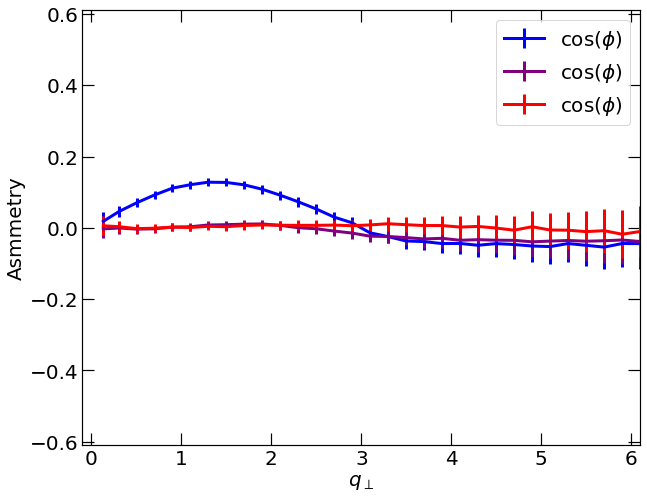

In [107]:
fig = plt.figure(figsize=(10,8))
colors=["blue","purple","red"]
for i,key in enumerate(keys[1:]):
    plt.errorbar(h1_of["q_perp"],h1_of[key],yerr=errors,label="$\cos(\phi)$",color=colors[i],linewidth=3)

plt.xlim(-0.1,6.1)
plt.ylim(-.61,.61)
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")

___

In [96]:
#Unweighted Avg of Asymmetries in Bins of q_perp
cos1_rp = np.cos(1*asymm_phi)
cos2_rp = np.cos(2*asymm_phi)
cos3_rp = np.cos(3*asymm_phi)
for i in range(N_Bins):
    
    bin_mask = digits==i
    bin_sum = len(q_perp[bin_mask])
    
    rapgap["q_perp"][i]= np.sum(q_perp[bin_mask])/bin_sum
    rapgap["cos1"][i] = np.sum(cos1_rp[bin_mask])/bin_sum
    rapgap["cos2"][i] = np.sum(cos2_rp[bin_mask])/bin_sum
    rapgap["cos3"][i] = np.sum(cos3_rp[bin_mask])/bin_sum

## Theory https://arxiv.org/pdf/2106.05307.pdf

In [10]:
theory = {}

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("theory_cos%iphi.npy"%(i))
    key = key+"_x"
    theory[key] = np.load("theory_cos%iphi_x.npy"%(i))

## Pythia [Roli+Kyle]

In [11]:
pythia = {}

for i in range(1,4):
    key = "cos%i"%(i)
    pythia[key] = genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,1]
    key = key+"_x"
    pythia[key] = genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,0]

___

## Overlay Everything

Text(0.5, 1.0, 'Unfolded H1,  Theory, and Pythia')

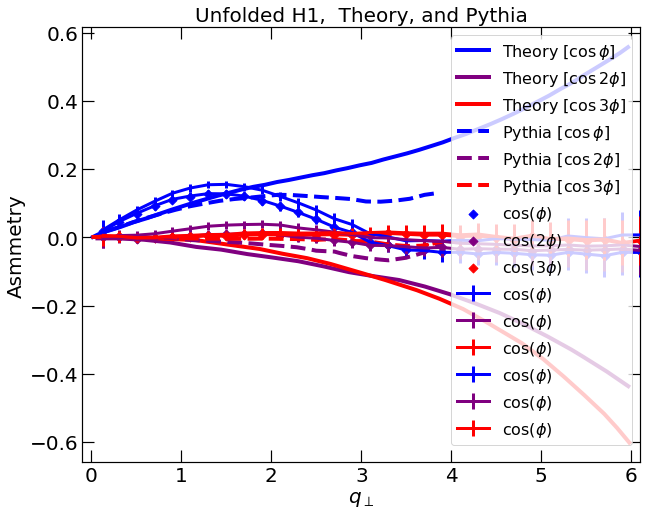

In [110]:
plot_data = True
plot_theory = True
plot_pythia = True
plot_rapgap = False

fig = plt.figure(figsize=(10,8))

if (plot_data):
    for i,key in enumerate(keys[1:]):
        plt.errorbar(h1_of["q_perp"],h1_of[key],yerr=errors,label="$\cos(\phi)$",color=colors[i],linewidth=3)
        
if (rapgap):
    for i,key in enumerate(keys[1:]):
        plt.errorbar(rapgap["q_perp"],rapgap[key],yerr=errors,label="$\cos(\phi)$",color=colors[i],linewidth=3)


    plt.scatter(q_perp_avg,of_cosphi,label="$\cos(\phi)$",color="blue",s=40,marker="D")
    plt.scatter(q_perp_avg,of_cos2_phi,label="$\cos(2\phi)$",color="purple",s=40,marker="D")
    plt.scatter(q_perp_avg,of_cos3_phi,label="$\cos(3\phi)$",color="red",s=40,marker="D")

if (plot_theory):
    plt.plot(theory['cos1_x'],theory['cos1'],label="Theory [$\cos\phi$]",linewidth=4,linestyle="solid",color="blue")
    plt.plot(theory['cos2_x'],theory['cos2'],label="Theory [$\cos2\phi$]",linewidth=4,linestyle="solid",color="purple")
    plt.plot(theory['cos3_x'],theory['cos3'],label="Theory [$\cos3\phi$]",linewidth=4,linestyle="solid",color="red")
    
if (plot_pythia):
    plt.plot(pythia['cos1_x'],pythia['cos1'],label="Pythia [$\cos\phi$]",linewidth=4,linestyle="dashed",color="blue")
    plt.plot(pythia['cos2_x'],pythia['cos2'],label="Pythia [$\cos2\phi$]",linewidth=4,linestyle="dashed",color="purple")
    plt.plot(pythia['cos3_x'],pythia['cos3'],label="Pythia [$\cos3\phi$]",linewidth=4,linestyle="dashed",color="red")

plt.xlim(-0.1,6.1)
#plt.ylim(-1.61,0.61)
plt.legend(fontsize=16)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)

string = ""
theory_string = ""
pythia_sttring = ""
if (plot_data):
    if (unfold):
        string = "Unfolded H1, "
    else:
        string = "Rapgap, "

if (plot_theory and plot_pythia):
    string += " Theory, and Pythia"

elif (plot_theory):
    string += "and Theory"

elif (plot_pythia):
    string += "and Pythia"
    
    
    
plt.savefig(string+".pdf")
plt.title(string,fontsize=20)

### 2D Asymmetry Histograms

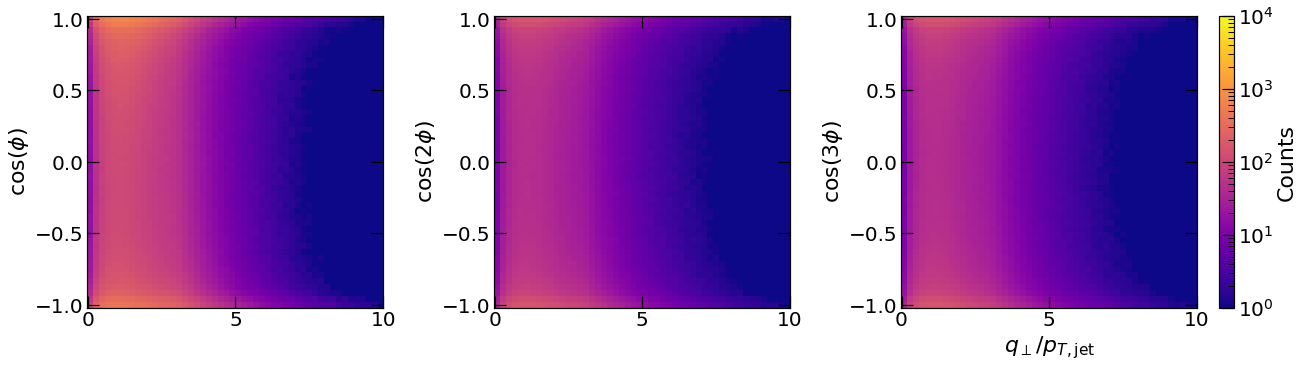

In [109]:
N_Bins = 51
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), constrained_layout=True)

h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm = axes[0].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[1].pcolormesh(xedges1, yedges1, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
axes[2].pcolormesh(xedges1, yedges1, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)

axes[0].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[1].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(3\phi)$",fontsize=22)

cb = fig.colorbar(pcm, ax=axes, pad=0)

plt.xlabel("$q_\perp/p_{T,\mathrm{jet}}$",fontsize=22)
cb.set_label("Counts",fontsize=22)
plt.savefig("2D_asymmetries.png")